# CUWALID TRAINING

## CUWALID: Python basics - Temporal data

To help you understand the model, it is useful to force the model with datasets that are simple to interpret.

Here you will find a set of functions that can help you to create synthetic time-series that can be used for model testing. DRYP uses *.csv and *.nc as temporal datasets for model forcings.

Below you can find a set of examples of synthetic datasets:
1. Create time-series as *.CSV files
2. Create gridded time-series datasets.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr
import calendar

In [38]:
def create_timeseries(pre=0.1, pet=0.1, years=5, ndayswet=10, ndaysdry=21):
	# precipitation = 0.20 #[mm/h]
	# Evapotrsnspiraiton rate
	# duration of the cycle
	# number of rainy days
	#nrain = 10 #days
	# number of dry days
	#ndry = 20 #days
	
	# Create pulse event
	data = np.ones(24*ndayswet)
	data = np.append(data, np.zeros(ndaysdry*24))#reshape(-1).reshape(-1)
	#print(data)# = np.append()
	
	# Create pulse event series
	data_1 = []
	for i in range(years*12):
		data_1 = np.append(data_1, data).reshape(-1)

	#data_1 = data_1.reshape(-1)
	# Creeate dataframe
	df = pd.DataFrame()
	
	# Date
	df['Date'] = pd.date_range(datetime.date(2000, 1, 1),
			periods=len(data_1), freq='H')	
	
	# Precipitation
	df['pre'] = data_1*pre
	
	# Evapotranspiration
	df['pet'] = pet*(np.sin(
		(np.arange(len(data_1))+18)*np.pi/12)+1.0)*0.5#+PET
	
	return df

def create_simple_timeseries(default_values=[-0.001, -0.001], var_name="fluxSZ", years=5):
	# length of data depend on number of years
	# Creeate dataframe
	df = pd.DataFrame()
	
	# Date
	df['Date'] = pd.date_range(datetime.date(2000, 1, 1),
			periods=24*365*years, freq='H')	
	
	# Precipitation
	for i, ivalue in enumerate(default_values):
		df[var_name+str(i)] = ivalue
	
	return df

In [39]:
def create_netcdf_from_dataframe(dataframe, ifield, lat, lon, time_var="Date"):
	"""Function to create netCDF files from csv viels"""
	
	# Create a DataArray with time, lat, and long dimensions
	da = xr.DataArray(
		dataframe[ifield].values[:, np.newaxis, np.newaxis]*
		np.ones((len(lat), len(lon))),
		dims=('time', 'lat', 'lon'),
		coords={'time': dataframe[time_var],
		'lat': lat,
		'lon': lon}
		)
	da = xr.Dataset({ifield: da})		
	return da

For the following examples you will store all outputs in the directory created only for this practicals:

In [40]:
folder = "C:/Users/Edisson/Documents/GitHub/CUWALID-Example/Examples/Python/"

## 1. Create timeseries as *.CSV files

#### Create synthetic time series of precipitation and potential evapotranspiration

In this example the user will create dataframe for precipitation and potential evapotranspiration using a step-wise function for precipitaiton and a sine function for the evapotranspirations.

In [41]:
# call function to create synthetic time series
ds = create_timeseries(pre=0.5, pet=0.2, years=5, ndayswet=10, ndaysdry=20)

C:\Users\Edisson\AppData\Local\Temp\ipykernel_36380\1221916998.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Date'] = pd.date_range(datetime.date(2000, 1, 1),


In [42]:
# create a path for the new dataset
fname = folder + "/mLA_time_series.csv"

In [43]:
# Save dataframe as csv file
ds.to_csv(fname,index = False)

In [44]:
#ds.sum()

Plot the outputs to see the results

<Axes: xlabel='Date'>

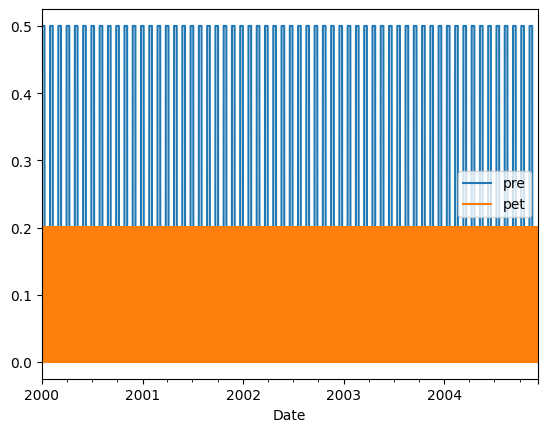

In [45]:
# You can use the in-build plot function to quicly plot datasets
ds.plot(x="Date")

#### Generate time series with constant values

Here, the user will create time series with constant values

In [46]:
# check the funcion at the beggining to undesrtand how it works
ds = create_simple_timeseries()

C:\Users\Edisson\AppData\Local\Temp\ipykernel_36380\1221916998.py:43: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Date'] = pd.date_range(datetime.date(2000, 1, 1),


In [47]:
# Specify the path of the output
fname = folder + "/ABS_60min.csv"

In [48]:
# Save dataframe
ds.to_csv(fname,index = False)

## 2. Generate gridded datasets

In this section, the user will become familiar with gridded datasets which are usually stored as *.nc files. The main advantage of this format is that it can store gridded temporal data efficiently, although it still can result in large files.

The examples below do not represent real values and are only as used with didactical porpuses.

### Create synthetic gridded as netCDF files

Specify the grid size and coordinates of the new gridded datasets

In [49]:
ncol = 21 # number of columns
nrow = 21 # number of rows
cell = 1000. # data grid size

In [50]:
# coordinates of gridded datasets
lat = np.linspace(0, nrow*cell, nrow)
lon = np.linspace(0, ncol*cell, ncol)

**Create crop coeficient**

In [51]:
# values of the variable to create, it will be used as a uniform value for the grid
kc = np.array([0.1, 0.1, 0.25, 0.50, 0.75, 1.0, 1.0, 1.0, 0.75, 0.50, 0.25, 0.10])
# time variable
time = np.arange(1, 13)

In [52]:
#Create a dataframe to resampling data at the expected temporal resolution
df = pd.DataFrame({"Date": time, "kc": kc})

In [53]:
# Create dataset, check the functions above to understand the function
ds = create_netcdf_from_dataframe(df, "kc", lat, lon)

In [54]:
fname = folder + "/DV_time_series_kc.nc"

In [55]:
# Save dataframe
ds.to_netcdf(fname)
#ds

**Create LAI**

Follow the same approach to create a new dataset with anothe variable

In [56]:
LAI = np.array([0.1, 0.1, 0.25, 0.50, 0.75, 1.0, 1.0, 0.75, 0.50, 0.25, 0.10, 0.1])

In [57]:
df = pd.DataFrame({"Date": time, "LAI": LAI})

In [58]:
ds = create_netcdf_from_dataframe(df, "LAI", lat, lon)

In [59]:
fname = folder + "/DV_time_series_LAI.nc"

In [60]:
# Save dataframe
ds.to_netcdf(fname)

**Create vegetation fraction cover**

Follow the same approach to create a new dataset with anothe variable

In [61]:
av = np.array([0.1, 0.1, 0.25, 0.50, 0.50, 0.5, 0.5, 0.5, 0.50, 0.25, 0.10, 0.10])

In [62]:
df = pd.DataFrame({"Date": time, "VegetationFraction": av})

In [63]:
ds = create_netcdf_from_dataframe(df, "VegetationFraction", lat, lon)

In [64]:
fname = folder + "/DV_time_series_av.nc"

In [65]:
# Save dataframe
ds.to_netcdf(fname)

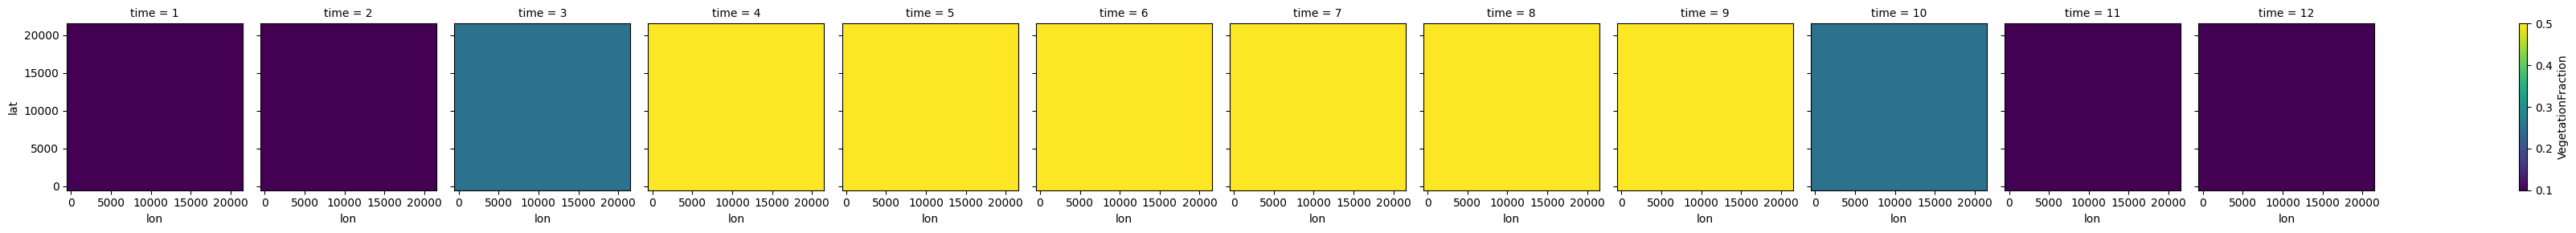

In [66]:
ds["VegetationFraction"].plot(x='lon', y='lat', col='time')

### Generate daily values in monthly files

In this section you will create multiple files corresponding each one to an specicif month.

The variable created will be the lastest variable stored in the cache so uncomment and run any of the specified variables if required.

In [67]:
def create_dailydataset_from_yearly(dataset, year=2020):
		
	# Assuming time is the coordinate for monthly data
	time_monthly = dataset['time'].values

	# Generate a list of the number of days in each month for a non-leap year
	days_per_month = [calendar.monthrange(year, month)[1] for month in time_monthly]

	# Generate a daily time coordinate
	time_daily = np.arange(1, sum(days_per_month))
	
	# update time
	dataset["time"] = np.cumsum(days_per_month)
		
	# Interpolate to daily values
	ds_daily = dataset.reindex(time=time_daily, method='nearest').interpolate_na(dim='time')
	
	# Save the interpolated data to a new NetCDF file
	#ds_daily.to_netcdf("daily_data.nc")
	return ds_daily
    
def create_daily_monthly_dataset_yearlyfiles(dataset, year=2020, fname=None):
		
	# Assuming time is the coordinate for monthly data
	time_monthly = dataset['time'].values

	# Generate a list of the number of days in each month for a non-leap year
	days_per_month = [calendar.monthrange(year, month)[1] for month in time_monthly]

	# Generate a daily time coordinate
	time_daily = np.arange(1, days_per_month[0]+1)
	
	# update time
	dataset["time"] = [1, days_per_month[0]+1]
		
	# Interpolate to daily values
	ds_month_daily = dataset.reindex(time=time_daily, method='nearest').interpolate_na(dim='time')
	
	# Save the interpolated data to a new NetCDF file
	if fname is not None:
		ds_month_daily.to_netcdf(fname)
	return ds_month_daily

In [68]:
#create_daily_monthly_dataset_yearlyfiles(ds)

In [69]:
ds['time'].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [70]:
#create_daily_monthly_dataset_yearlyfiles(ds["VegetationFraction"][0:2])
#dfs = ds["VegetationFraction"][1:3]

Loop over each month (0 to 11) to generate input files for each month.

Special handling: if index is 0 (i.e., January), assign imonth as 12 (December) to wrap around.

Define file name for output LAI time series using formatted month value.
Other vegetation variables (kc, av, VegetationFraction) are shown as commented alternatives.
Generate time series using two-month slices of the LAI dataset and save to the specified file.


In [71]:
for i, imonth in enumerate(range(12)):
    if i == 0:
        imonth = 12
    #fname = folder + "/DV_time_series_kc_"+"{:02}".format(imonth)+".nc"
    #fname = folder + "/DV_time_series_LAI_"+"{:02}".format(imonth)+".nc"
    fname = folder + "/DV_time_series_av_"+"{:02}".format(i+1)+".nc"
    
    #print(i-1,i, fname)
    #create_daily_monthly_dataset_yearlyfiles(ds["kc"][[i-1,i]], fname=fname)
    #create_daily_monthly_dataset_yearlyfiles(ds["LAI"][[i-1,i]], fname=fname)
    create_daily_monthly_dataset_yearlyfiles(ds["VegetationFraction"][[i-1,i]], fname=fname)

In [72]:
fname = folder + "/DV_time_series_LAI_02.nc"

In [73]:
#xr.open_dataset(fname)